<a href="https://colab.research.google.com/github/3madMostafa/selected_project/blob/main/numerical_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The scenario  will be as follows 
* Importing the libraries
* Data preparation 
* Data preprocessing
* Analysis data
* Visualization
* Split data
* Evaluate model
* Conclusion

kaggle api

In [ ]:
#import os
#os.environ ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
#!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

In [ ]:
#!unzip \*.zip && rm *.zip

## Import libraries

In [ ]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, auc, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential 
from keras.layers import Activation, Dense

## data preparation

In [ ]:
dataframe=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
dataframe

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [ ]:
dataframe.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
dataframe.describe(exclude=['int64', 'float'])

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [ ]:
# display the many category in each column
columns = list(dataframe.columns)
for i in columns:
    if dataframe[i].dtype == 'object':
        print('=============',i,'============\n\n\n', dataframe[i].value_counts(), end='\n\n\n')

============= gender ============


 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


============= ever_married ============


 Yes    3353
No     1757
Name: ever_married, dtype: int64


============= work_type ============


 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


============= Residence_type ============


 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


============= smoking_status ============


 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




* We can see that the majority group is `Married woman` who live in `Urban`, who do `Not smoke` and whose work is normally classified as `Private`.  

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* *there are some objects data type should deal with them*

In [ ]:
dataframe.skew(axis=0, skipna=True)

C:\Users\MBR\AppData\Local\Temp\ipykernel_14696\1492780692.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.skew(axis=0, skipna=True)


id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

## Data preprocessing

In [ ]:
# check duplicated values 
dataframe.duplicated().unique() # there is no duplicated data


array([False])

In [ ]:
# check missing values
dataframe.isna().sum()



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* there are some missing values in column `BMI`

In [ ]:
dataframe=dataframe.drop('id', axis=1) 

In [ ]:
# rename column
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
dataframe.columns = ['gender', 'age', 'hypertension', 'heartDisease', 'everMarried',
       'workType', 'ResidenceType', 'avgGlucoseLevel', 'bmi',
       'smokingStatus', 'stroke']

In [ ]:
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heartDisease', 'everMarried',
       'workType', 'ResidenceType', 'avgGlucoseLevel', 'bmi', 'smokingStatus',
       'stroke'],
      dtype='object')

In [ ]:
# before i do any handling or visualization i will make a copy from date
data_copy = dataframe[:]

In [ ]:
data_copy

gender   age  hypertension  heartDisease everMarried       workType  \
0       Male  67.0             0             1         Yes        Private   
1     Female  61.0             0             0         Yes  Self-employed   
2       Male  80.0             0             1         Yes        Private   
3     Female  49.0             0             0         Yes        Private   
4     Female  79.0             1             0         Yes  Self-employed   
...      ...   ...           ...           ...         ...            ...   
5105  Female  80.0             1             0         Yes        Private   
5106  Female  81.0             0             0         Yes  Self-employed   
5107  Female  35.0             0             0         Yes  Self-employed   
5108    Male  51.0             0             0         Yes        Private   
5109  Female  44.0             0             0         Yes       Govt_job   

     ResidenceType  avgGlucoseLevel   bmi    smokingStatus  stroke  
0            Urban           228.69  36.6  formerly smoked       1  
1            Rural           202.21   NaN     never smoked       1  
2            Rural           105.92  32.5     never smoked       1  
3            Urban           171.23  34.4           smokes       1  
4            Rural           174.12  24.0     never smoked       1  
...            ...              ...   ...              ...     ...  
5105         Urban            83.75   NaN     never smoked       0  
5106         Urban           125.20  40.0     never smoked       0  
5107         Rural            82.99  30.6     never smoked       0  
5108         Rural           166.29  25.6  formerly smoked       0  
5109         Urban            85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

### Handling categorical data


In [ ]:
# Separate the categorical data type from each other, either by two or more

twoCat = [i for i in dataframe if len(dataframe[i].unique()) == 2 and dataframe[i].dtype == 'object']
moreTwoCat = [i for i in dataframe if len(dataframe[i].unique()) > 2 and dataframe[i].dtype == 'object']

In [ ]:
dataframe['gender'].dtype == 'object'

True

In [ ]:


# Initialize One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(dataframe[['gender', 'everMarried', 'workType', 'ResidenceType', 'smokingStatus']]).toarray()

# Get newly encoded columns and concat them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(), data = df_temp)
encodings = encodings.astype(int)
dataframe = pd.concat([dataframe,encodings] , axis=1)

# Drop original columns from the dataset after encoding is done
dataframe.drop(['gender', 'everMarried', 'workType', 'ResidenceType', 'smokingStatus'],axis = 1, inplace=True)
dataframe.head()

age  hypertension  heartDisease  avgGlucoseLevel   bmi  stroke  \
0  67.0             0             1           228.69  36.6       1   
1  61.0             0             0           202.21   NaN       1   
2  80.0             0             1           105.92  32.5       1   
3  49.0             0             0           171.23  34.4       1   
4  79.0             1             0           174.12  24.0       1   

   gender_Female  gender_Male  gender_Other  everMarried_No  ...  \
0              0            1             0               0  ...   
1              1            0             0               0  ...   
2              0            1             0               0  ...   
3              1            0             0               0  ...   
4              1            0             0               0  ...   

   workType_Never_worked  workType_Private  workType_Self-employed  \
0                      0                 1                       0   
1                      0                 0                       1   
2                      0                 1                       0   
3                      0                 1                       0   
4                      0                 0                       1   

   workType_children  ResidenceType_Rural  ResidenceType_Urban  \
0                  0                    0                    1   
1                  0                    1                    0   
2                  0                    1                    0   
3                  0                    0                    1   
4                  0                    1                    0   

   smokingStatus_Unknown  smokingStatus_formerly smoked  \
0                      0                              1   
1                      0                              0   
2                      0                              0   
3                      0                              0   
4                      0                              0   

   smokingStatus_never smoked  smokingStatus_smokes  
0                           0                     0  
1                           1                     0  
2                           1                     0  
3                           0                     1  
4                           1                     0  

[5 rows x 22 columns]

In [ ]:
dataframe.columns

Index(['age', 'hypertension', 'heartDisease', 'avgGlucoseLevel', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'everMarried_No', 'everMarried_Yes', 'workType_Govt_job',
       'workType_Never_worked', 'workType_Private', 'workType_Self-employed',
       'workType_children', 'ResidenceType_Rural', 'ResidenceType_Urban',
       'smokingStatus_Unknown', 'smokingStatus_formerly smoked',
       'smokingStatus_never smoked', 'smokingStatus_smokes'],
      dtype='object')

In [ ]:
# replace null value with mean using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # make object from class
imputedData = imputer.fit(dataframe)
dataframe = imputedData.transform(dataframe)


In [ ]:
# transform the data from 2D-array to Dataframe
columns = ['age', 'hypertension', 'heartDisease', 'avgGlucoseLevel', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'everMarried_No', 'everMarried_Yes', 'workType_Govt_job',
       'workType_Never_worked', 'workType_Private', 'workType_Self-employed',
       'workType_children', 'ResidenceType_Rural', 'ResidenceType_Urban',
       'smokingStatus_Unknown', 'smokingStatus_formerly smoked',
       'smokingStatus_never smoked', 'smokingStatus_smokes']
dataframe = pd.DataFrame(dataframe, columns=columns)
dataframe

age  hypertension  heartDisease  avgGlucoseLevel        bmi  stroke  \
0     67.0           0.0           1.0           228.69  36.600000     1.0   
1     61.0           0.0           0.0           202.21  28.893237     1.0   
2     80.0           0.0           1.0           105.92  32.500000     1.0   
3     49.0           0.0           0.0           171.23  34.400000     1.0   
4     79.0           1.0           0.0           174.12  24.000000     1.0   
...    ...           ...           ...              ...        ...     ...   
5105  80.0           1.0           0.0            83.75  28.893237     0.0   
5106  81.0           0.0           0.0           125.20  40.000000     0.0   
5107  35.0           0.0           0.0            82.99  30.600000     0.0   
5108  51.0           0.0           0.0           166.29  25.600000     0.0   
5109  44.0           0.0           0.0            85.28  26.200000     0.0   

      gender_Female  gender_Male  gender_Other  everMarried_No  ...  \
0               0.0          1.0           0.0             0.0  ...   
1               1.0          0.0           0.0             0.0  ...   
2               0.0          1.0           0.0             0.0  ...   
3               1.0          0.0           0.0             0.0  ...   
4               1.0          0.0           0.0             0.0  ...   
...             ...          ...           ...             ...  ...   
5105            1.0          0.0           0.0             0.0  ...   
5106            1.0          0.0           0.0             0.0  ...   
5107            1.0          0.0           0.0             0.0  ...   
5108            0.0          1.0           0.0             0.0  ...   
5109            1.0          0.0           0.0             0.0  ...   

      workType_Never_worked  workType_Private  workType_Self-employed  \
0                       0.0               1.0                     0.0   
1                       0.0               0.0                     1.0   
2                       0.0               1.0                     0.0   
3                       0.0               1.0                     0.0   
4                       0.0               0.0                     1.0   
...                     ...               ...                     ...   
5105                    0.0               1.0                     0.0   
5106                    0.0               0.0                     1.0   
5107                    0.0               0.0                     1.0   
5108                    0.0               1.0                     0.0   
5109                    0.0               0.0                     0.0   

      workType_children  ResidenceType_Rural  ResidenceType_Urban  \
0                   0.0                  0.0                  1.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  1.0                  0.0   
3                   0.0                  0.0                  1.0   
4                   0.0                  1.0                  0.0   
...                 ...                  ...                  ...   
5105                0.0                  0.0                  1.0   
5106                0.0                  0.0                  1.0   
5107                0.0                  1.0                  0.0   
5108                0.0                  1.0                  0.0   
5109                0.0                  0.0                  1.0   

      smokingStatus_Unknown  smokingStatus_formerly smoked  \
0                       0.0                            1.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            0.0   
...                     ...                            ...   
5105                    0.0                            0.0   
5106           

In [ ]:
dataframe.isna().sum()

age                              0
hypertension                     0
heartDisease                     0
avgGlucoseLevel                  0
bmi                              0
stroke                           0
gender_Female                    0
gender_Male                      0
gender_Other                     0
everMarried_No                   0
everMarried_Yes                  0
workType_Govt_job                0
workType_Never_worked            0
workType_Private                 0
workType_Self-employed           0
workType_children                0
ResidenceType_Rural              0
ResidenceType_Urban              0
smokingStatus_Unknown            0
smokingStatus_formerly smoked    0
smokingStatus_never smoked       0
smokingStatus_smokes             0
dtype: int64

In [ ]:
dataframe.head()

age  hypertension  heartDisease  avgGlucoseLevel        bmi  stroke  \
0  67.0           0.0           1.0           228.69  36.600000     1.0   
1  61.0           0.0           0.0           202.21  28.893237     1.0   
2  80.0           0.0           1.0           105.92  32.500000     1.0   
3  49.0           0.0           0.0           171.23  34.400000     1.0   
4  79.0           1.0           0.0           174.12  24.000000     1.0   

   gender_Female  gender_Male  gender_Other  everMarried_No  ...  \
0            0.0          1.0           0.0             0.0  ...   
1            1.0          0.0           0.0             0.0  ...   
2            0.0          1.0           0.0             0.0  ...   
3            1.0          0.0           0.0             0.0  ...   
4            1.0          0.0           0.0             0.0  ...   

   workType_Never_worked  workType_Private  workType_Self-employed  \
0                    0.0               1.0                     0.0   
1                    0.0               0.0                     1.0   
2                    0.0               1.0                     0.0   
3                    0.0               1.0                     0.0   
4                    0.0               0.0                     1.0   

   workType_children  ResidenceType_Rural  ResidenceType_Urban  \
0                0.0                  0.0                  1.0   
1                0.0                  1.0                  0.0   
2                0.0                  1.0                  0.0   
3                0.0                  0.0                  1.0   
4                0.0                  1.0                  0.0   

   smokingStatus_Unknown  smokingStatus_formerly smoked  \
0                    0.0                            1.0   
1                    0.0                            0.0   
2                    0.0                            0.0   
3                    0.0                            0.0   
4                    0.0                            0.0   

   smokingStatus_never smoked  smokingStatus_smokes  
0                         0.0                   0.0  
1                         1.0                   0.0  
2                         1.0                   0.0  
3                         0.0                   1.0  
4                         1.0                   0.0  

[5 rows x 22 columns]

### Handling outliers

In [ ]:
dataframe.describe()

age  hypertension  heartDisease  avgGlucoseLevel          bmi  \
count  5110.000000   5110.000000   5110.000000      5110.000000  5110.000000   
mean     43.226614      0.097456      0.054012       106.147677    28.893237   
std      22.612647      0.296607      0.226063        45.283560     7.698018   
min       0.080000      0.000000      0.000000        55.120000    10.300000   
25%      25.000000      0.000000      0.000000        77.245000    23.800000   
50%      45.000000      0.000000      0.000000        91.885000    28.400000   
75%      61.000000      0.000000      0.000000       114.090000    32.800000   
max      82.000000      1.000000      1.000000       271.740000    97.600000   

            stroke  gender_Female  gender_Male  gender_Other  everMarried_No  \
count  5110.000000    5110.000000  5110.000000   5110.000000     5110.000000   
mean      0.048728       0.585910     0.413894      0.000196        0.343836   
std       0.215320       0.492612     0.492578      0.013989        0.475034   
min       0.000000       0.000000     0.000000      0.000000        0.000000   
25%       0.000000       0.000000     0.000000      0.000000        0.000000   
50%       0.000000       1.000000     0.000000      0.000000        0.000000   
75%       0.000000       1.000000     1.000000      0.000000        1.000000   
max       1.000000       1.000000     1.000000      1.000000        1.000000   

       ...  workType_Never_worked  workType_Private  workType_Self-employed  \
count  ...            5110.000000       5110.000000             5110.000000   
mean   ...               0.004305          0.572407                0.160274   
std    ...               0.065480          0.494778                0.366896   
min    ...               0.000000          0.000000                0.000000   
25%    ...               0.000000          0.000000                0.000000   
50%    ...               0.000000          1.000000                0.000000   
75%    ...               0.000000          1.000000                0.000000   
max    ...               1.000000          1.000000                1.000000   

       workType_children  ResidenceType_Rural  ResidenceType_Urban  \
count        5110.000000          5110.000000          5110.000000   
mean            0.134442             0.491977             0.508023   
std             0.341160             0.499985             0.499985   
min             0.000000             0.000000             0.000000   
25%             0.000000             0.000000             0.000000   
50%             0.000000             0.000000             1.000000   
75%             0.000000             1.000000             1.000000   
max             1.000000             1.000000             1.000000   

       smokingStatus_Unknown  smokingStatus_formerly smoked  \
count            5110.000000                    5110.000000   
mean                0.302153                       0.173190   
std                 0.459236                       0.378448   
min                 0.000000                       0.000000   
25%                 0.000000                       0.000000   
50%                 0.000000                       0.000000   
75%                 1.000000                       0.000000   
max                 1.000000                       1.000000   

       smokingStatus_never smoked  smokingStatus_smokes  
count                 5110.000000           5110.000000  
mean                     0.370254              0.154403  
std                      0.482920              0.361370  
min                      0.000000              0.000000  
25%                      0.000000              0.000000  
50%                      0.000000              0.000000  
75%                      1.000000              0.000000  
max                      1.000000              1.000000  

[8 rows x 22 columns]

In [ ]:
df = dataframe[['age', 'avgGlucoseLevel', 'bmi']]

In [ ]:
dataframe.skew(axis=0, skipna=True)

age                              -0.137059
hypertension                      2.715392
heartDisease                      3.947244
avgGlucoseLevel                   1.572284
bmi                               1.076716
stroke                            4.193284
gender_Female                    -0.348930
gender_Male                       0.349749
gender_Other                     71.484264
everMarried_No                    0.657745
everMarried_Yes                  -0.657745
workType_Govt_job                 2.219958
workType_Never_worked            15.146344
workType_Private                 -0.292800
workType_Self-employed            1.852619
workType_children                 2.143866
ResidenceType_Rural               0.032107
ResidenceType_Urban              -0.032107
smokingStatus_Unknown             0.861974
smokingStatus_formerly smoked     1.727782
smokingStatus_never smoked        0.537548
smokingStatus_smokes              1.913452
dtype: float64

In [ ]:
df

age  avgGlucoseLevel        bmi
0     67.0           228.69  36.600000
1     61.0           202.21  28.893237
2     80.0           105.92  32.500000
3     49.0           171.23  34.400000
4     79.0           174.12  24.000000
...    ...              ...        ...
5105  80.0            83.75  28.893237
5106  81.0           125.20  40.000000
5107  35.0            82.99  30.600000
5108  51.0           166.29  25.600000
5109  44.0            85.28  26.200000

[5110 rows x 3 columns]

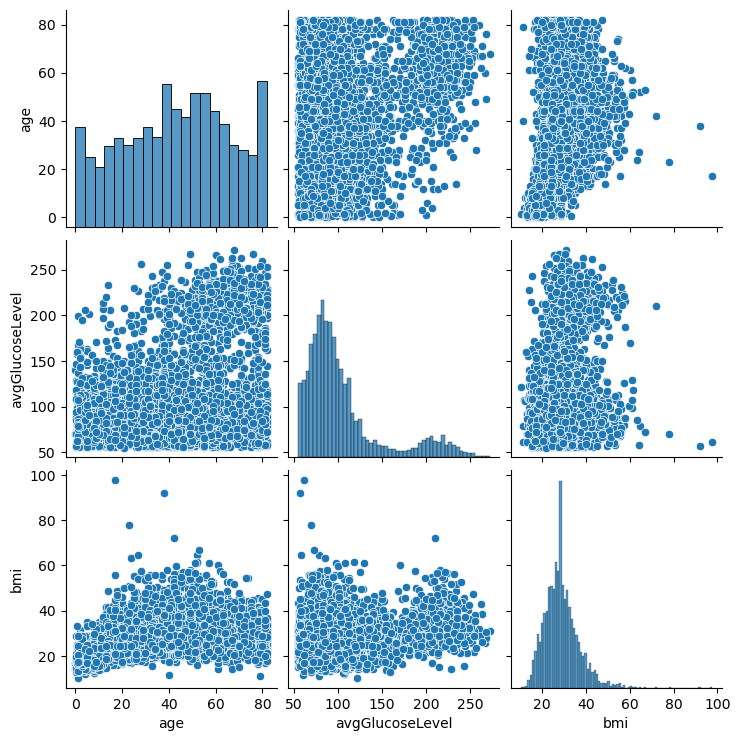

In [ ]:
sns.pairplot(dataframe[['age', 'avgGlucoseLevel', 'bmi']])

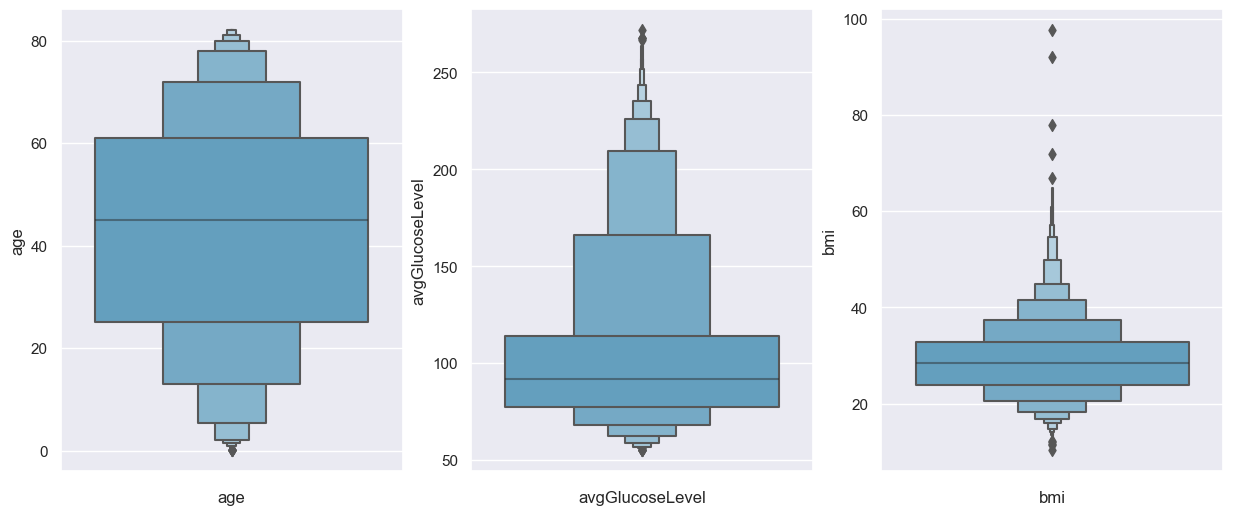

In [ ]:

# Set seaborn style palette
sns.set_theme(style="darkgrid", palette="icefire")

# Array of columns that we would like to plot
cols = ['age', 'avgGlucoseLevel', 'bmi']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
    (sns.boxenplot(y=dataframe[cols[i]],data=dataframe, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

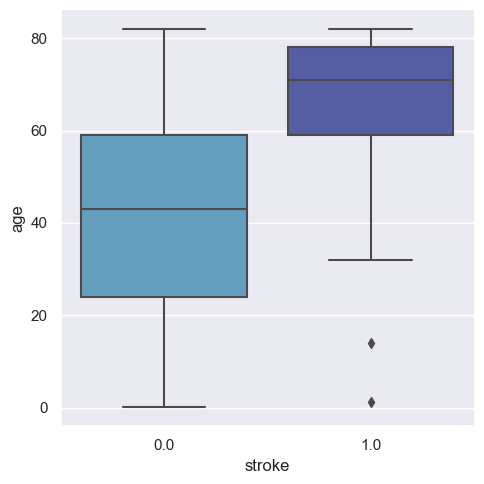

In [ ]:
(sns.catplot(data=dataframe, x="stroke", y='age', kind="box"))#checking for outliers


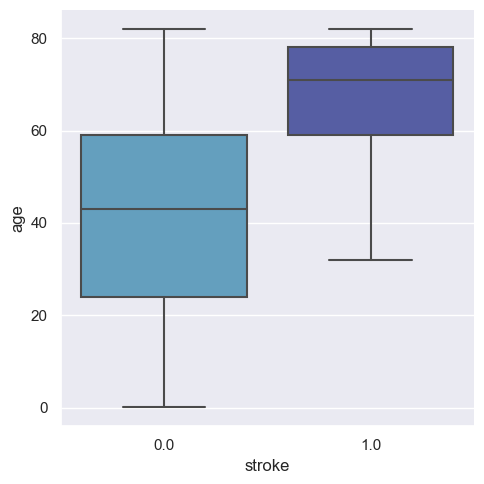

In [ ]:
indexAge = dataframe[((dataframe['age'] < 20) & (dataframe['stroke'] == 1)) ].index  #find the indexes of outliers
dataframe.drop(indexAge , inplace=True) # drop the outliers
(sns.catplot(data=dataframe, x="stroke", y='age', kind="box"))#checking for outliers

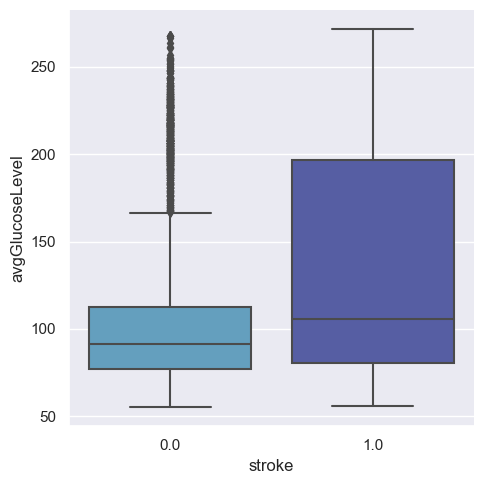

In [ ]:
sns.catplot(data=dataframe, x="stroke", y="avgGlucoseLevel", kind="box")

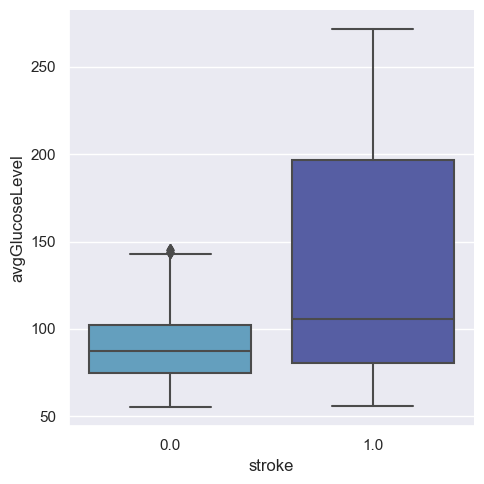

In [ ]:
indexavgGlucoseLevel = dataframe[((dataframe['avgGlucoseLevel'] > 146) & (dataframe['stroke'] == 0)) ].index  #find the indexes of outliers
dataframe.drop(indexavgGlucoseLevel , inplace=True) # drop the outliers
sns.catplot(data=dataframe, x="stroke", y="avgGlucoseLevel", kind="box")

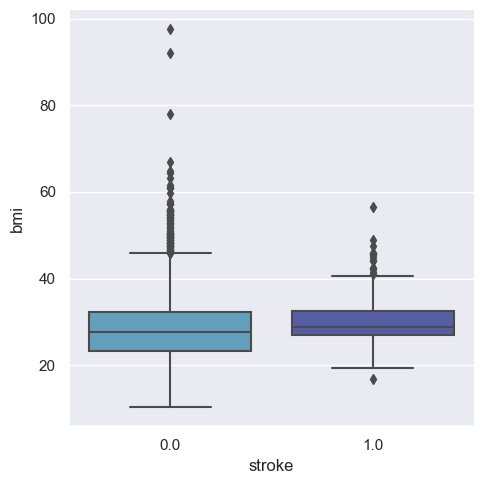

In [ ]:
sns.catplot(data=dataframe, x="stroke", y="bmi", kind="box")

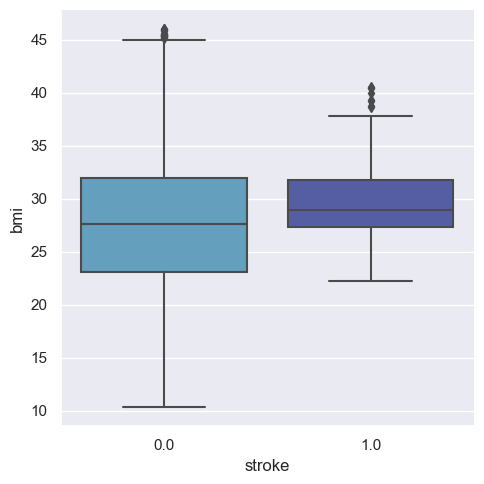

In [ ]:
indexBmi = dataframe[((dataframe['bmi'] > 46) & (dataframe['stroke'] == 0)) ].index
dataframe.drop(indexBmi , inplace=True)

indexBmi = dataframe[((dataframe['bmi'] > 41) & (dataframe['stroke'] == 1)) ].index
dataframe.drop(indexBmi , inplace=True)

indexBmi = dataframe[((dataframe['bmi'] < 22) & (dataframe['stroke'] == 1)) ].index
indexBmi.shape
dataframe.drop(indexBmi , inplace=True)
sns.catplot(data=dataframe, x="stroke", y="bmi", kind="box")

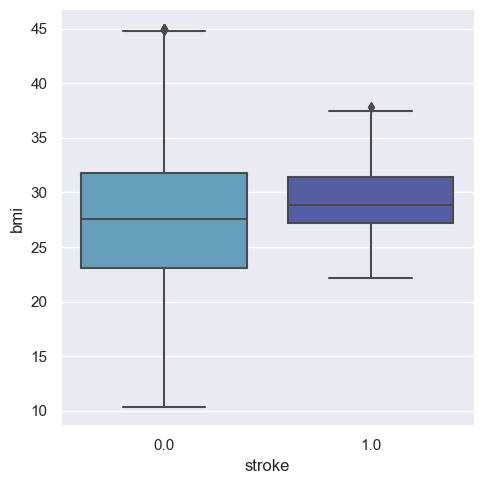

In [ ]:
indexBmi = dataframe[((dataframe['bmi'] > 45) & (dataframe['stroke'] == 0)) ].index
dataframe.drop(indexBmi , inplace=True)

indexBmi = dataframe[((dataframe['bmi'] > 38) & (dataframe['stroke'] == 1)) ].index
dataframe.drop(indexBmi , inplace=True)

indexBmi.shape
sns.catplot(data=dataframe, x="stroke", y="bmi", kind="box")

<AxesSubplot:>

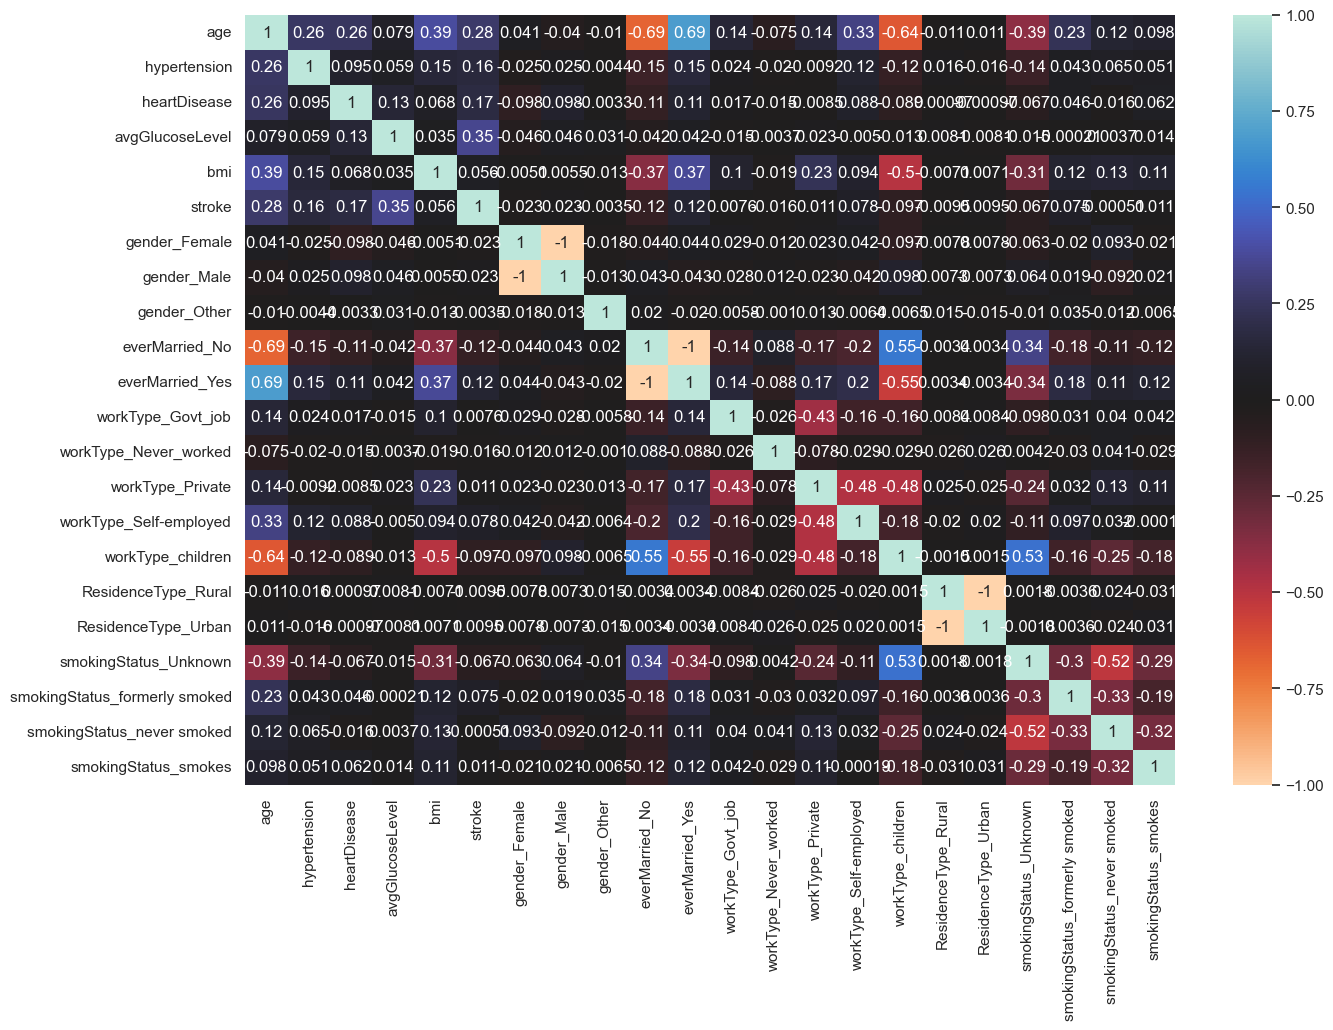

In [ ]:
# display correlation between each column
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pd.DataFrame(dataframe, columns=columns).corr(), annot=True, cmap='icefire_r',ax=ax)

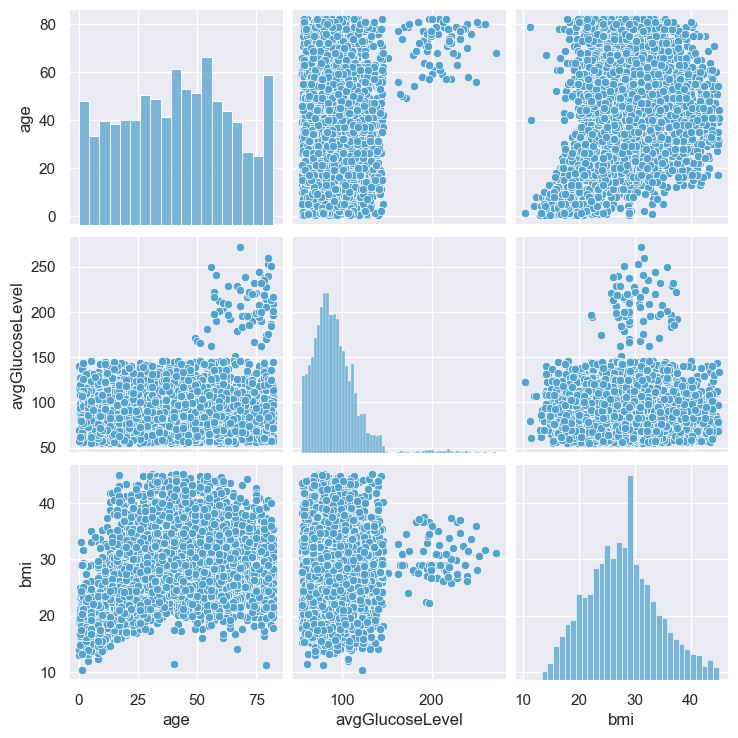

In [ ]:
sns.pairplot(dataframe[['age', 'avgGlucoseLevel', 'bmi']])

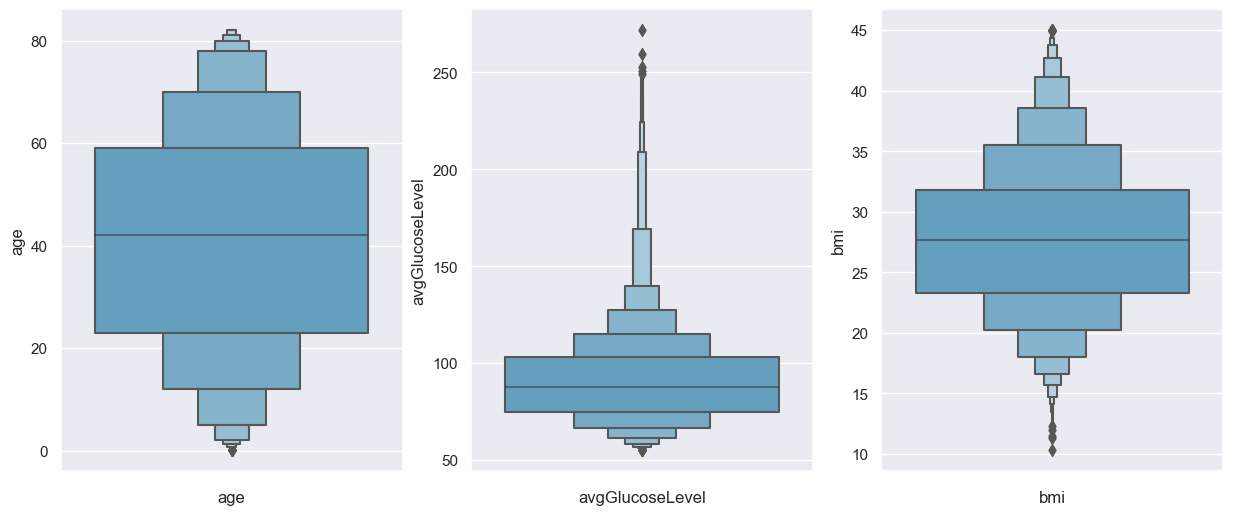

In [ ]:
# Set seaborn style palette
sns.set_theme(style="darkgrid", palette="icefire")

# Array of columns that we would like to plot
cols = ['age', 'avgGlucoseLevel', 'bmi']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
    (sns.boxenplot(y=dataframe[cols[i]],data=dataframe, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

## visualization

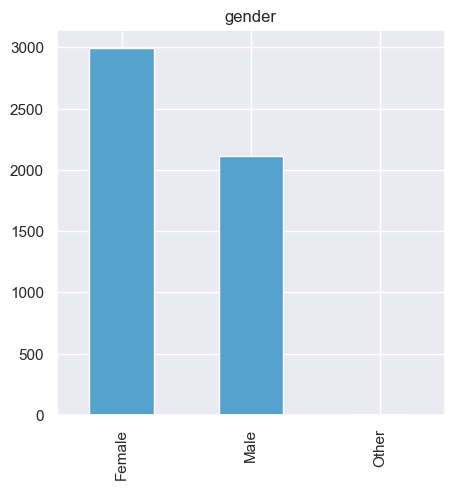

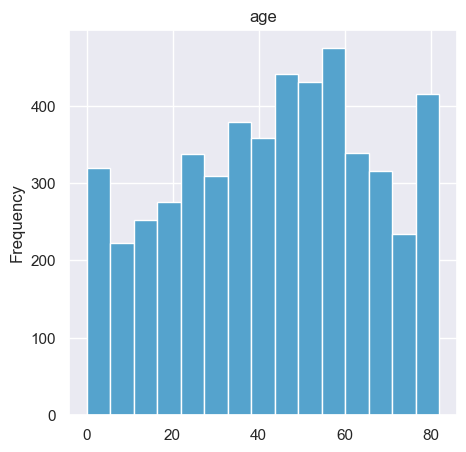

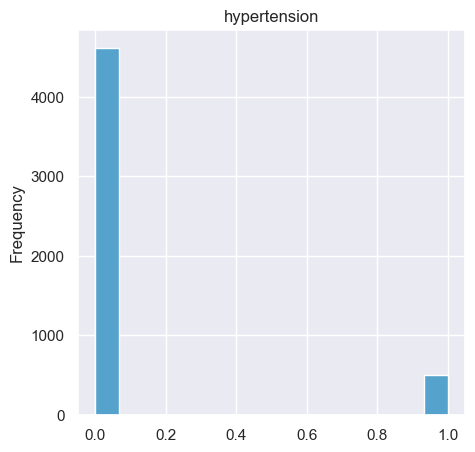

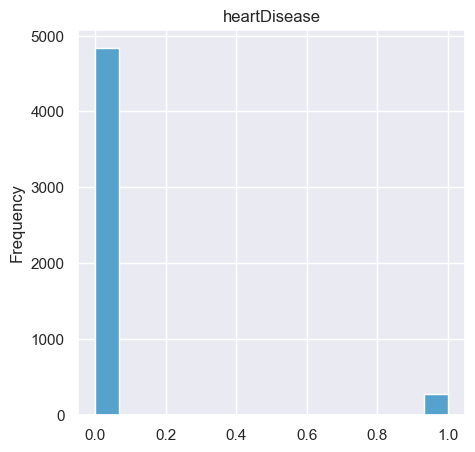

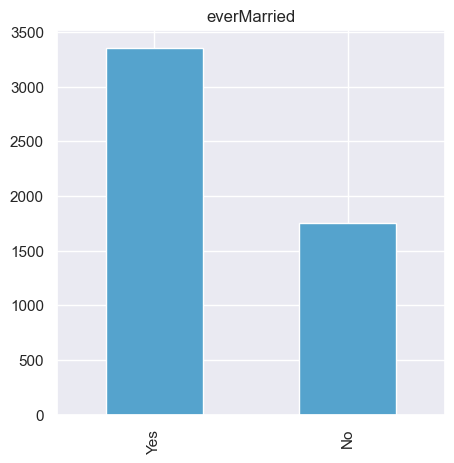

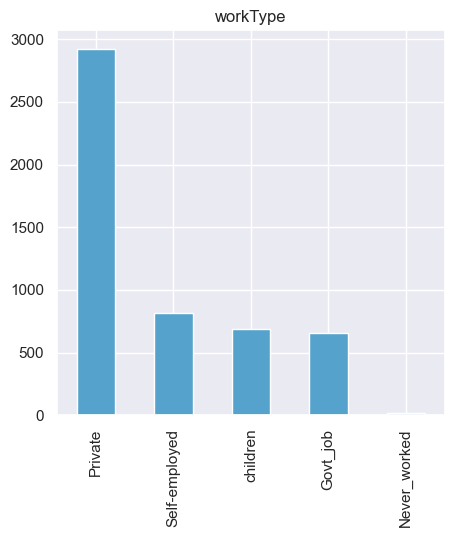

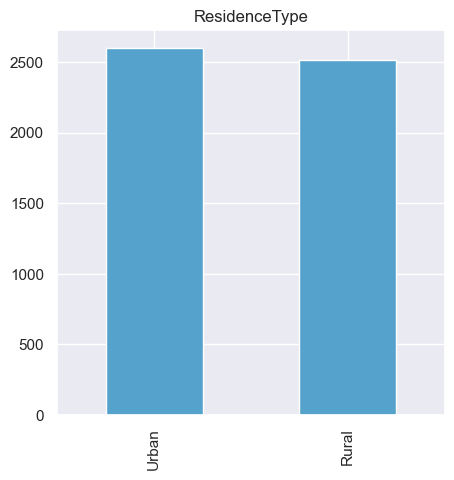

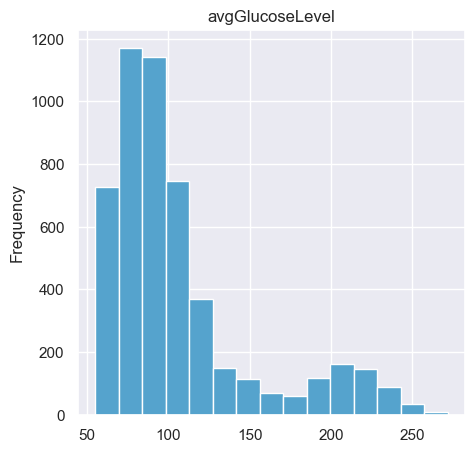

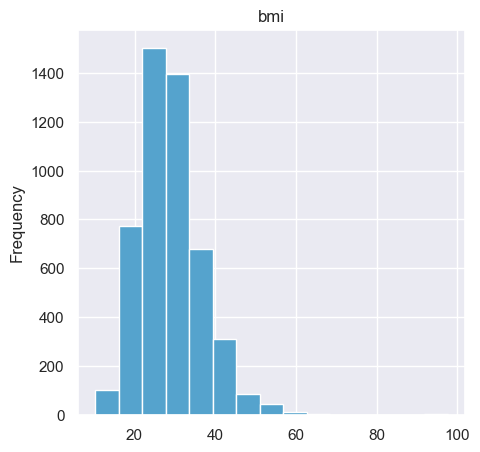

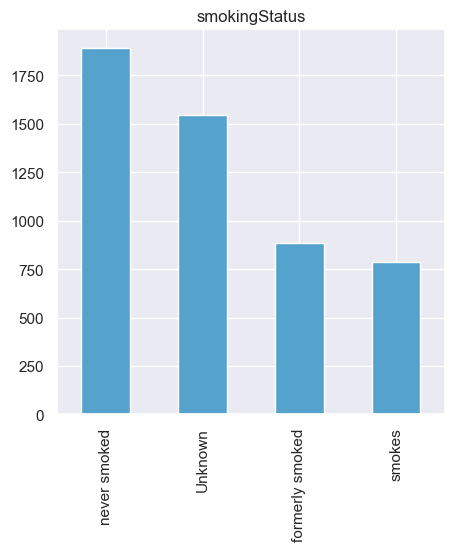

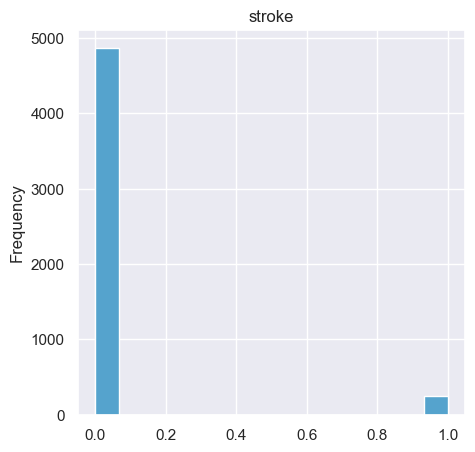

In [ ]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for column in data_copy:
    plt.figure(column, figsize = (5, 5))
    plt.title(column)
    if is_numeric_dtype(data_copy[column]):
        data_copy[column].plot(kind = 'hist', bins=15)
    elif is_string_dtype(data_copy[column]):
        data_copy[column].value_counts()[:10].plot(kind = 'bar')

In [ ]:
num_list = [column for column in data_copy if is_numeric_dtype(data_copy[column])]
cat_list = [column for column in data_copy if is_string_dtype(data_copy[column])]
print('Numerical columns', num_list)
print('Categorical columns', cat_list)

Numerical columns ['age', 'hypertension', 'heartDisease', 'avgGlucoseLevel', 'bmi', 'stroke']
Categorical columns ['gender', 'everMarried', 'workType', 'ResidenceType', 'smokingStatus']


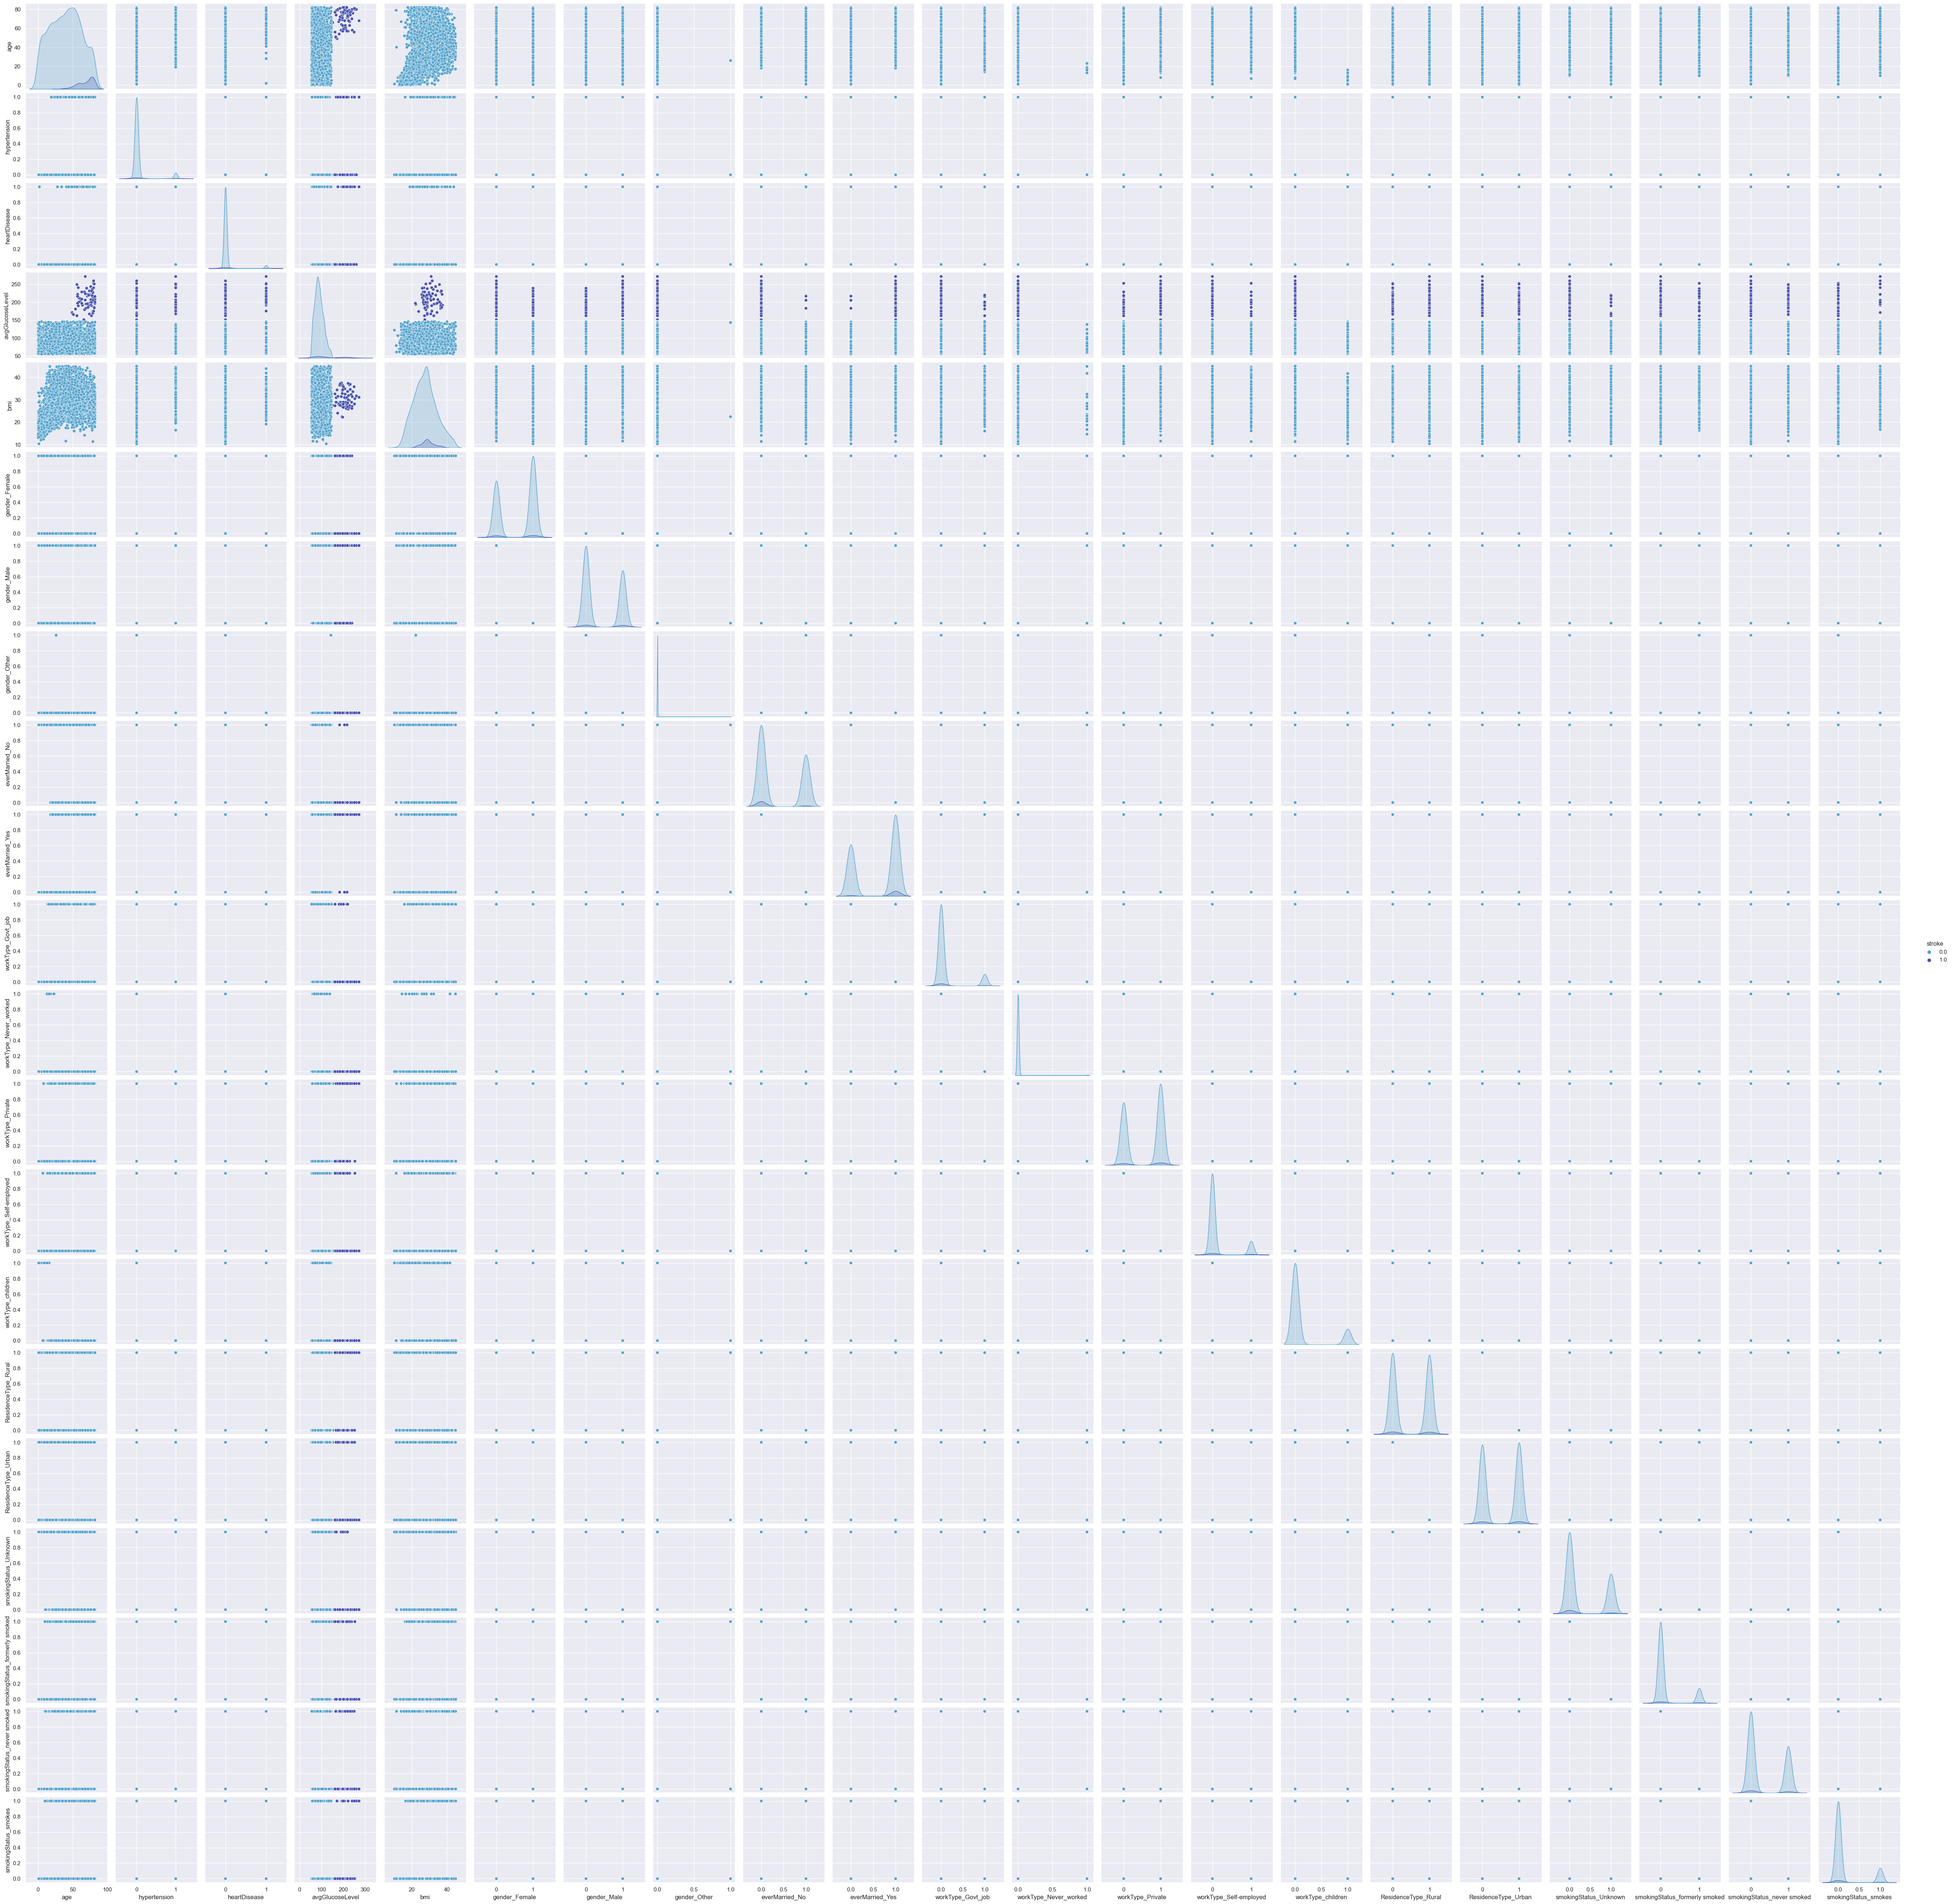

In [ ]:
sns.pairplot(dataframe,height = 2.5, hue='stroke')

In [ ]:
df=data_copy

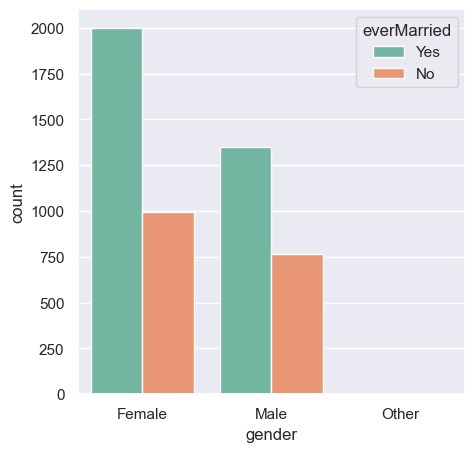

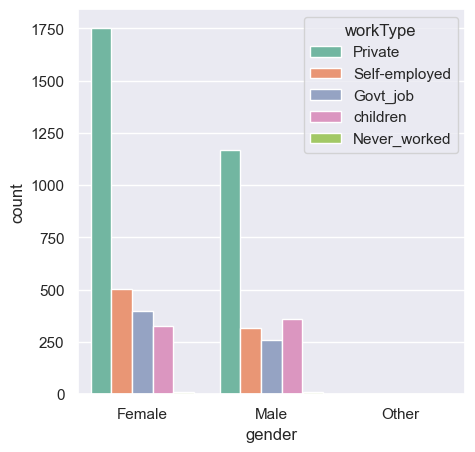

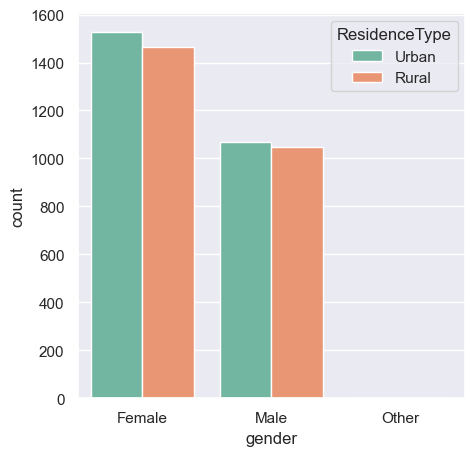

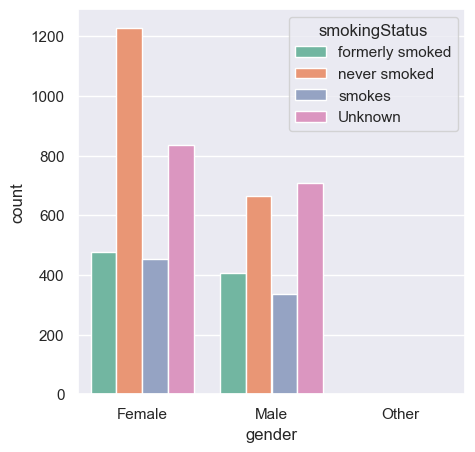

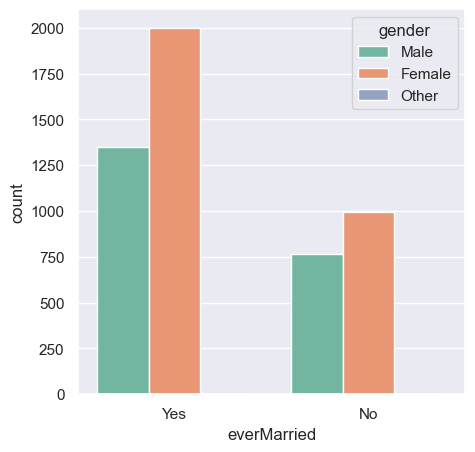

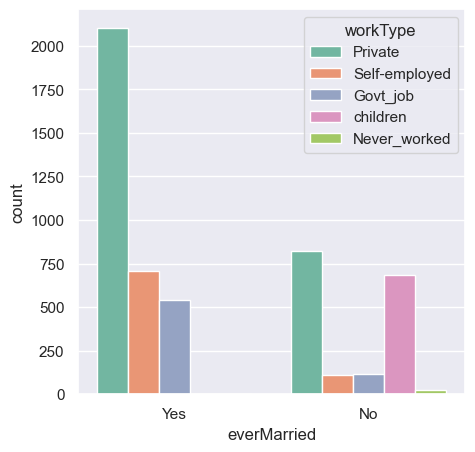

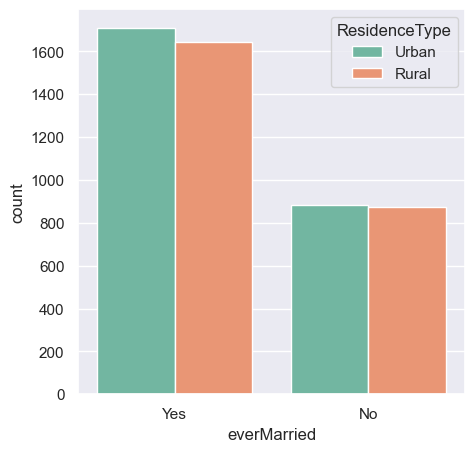

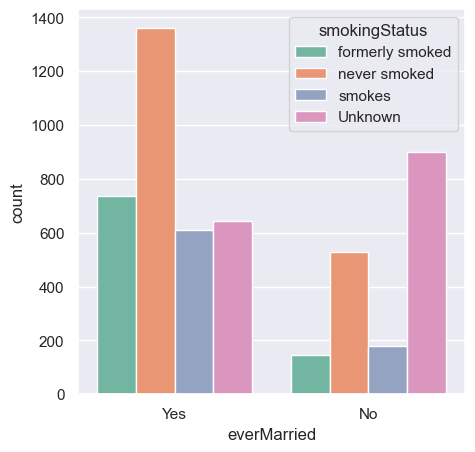

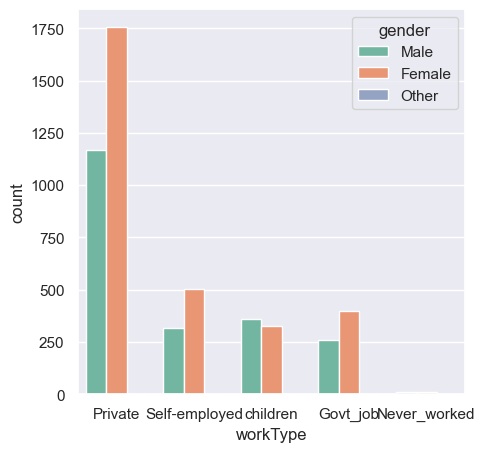

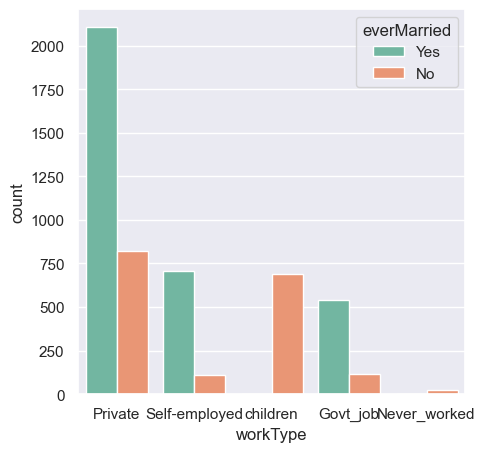

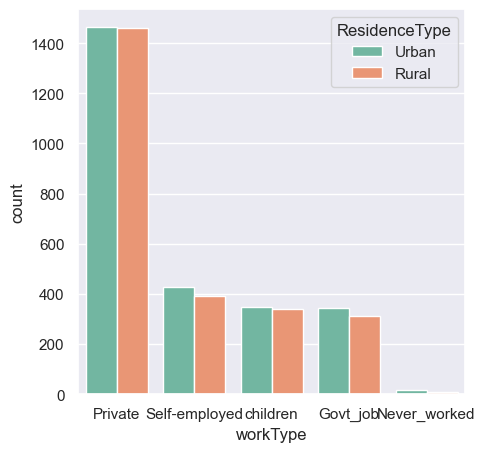

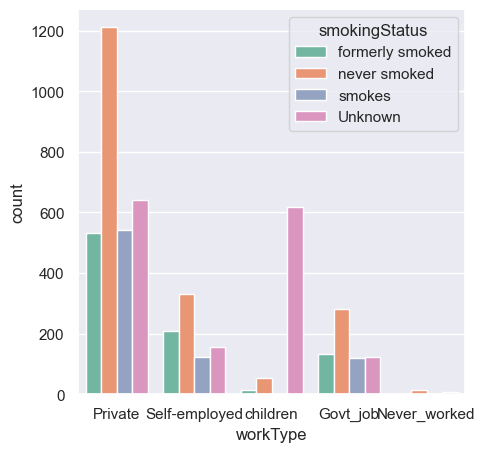

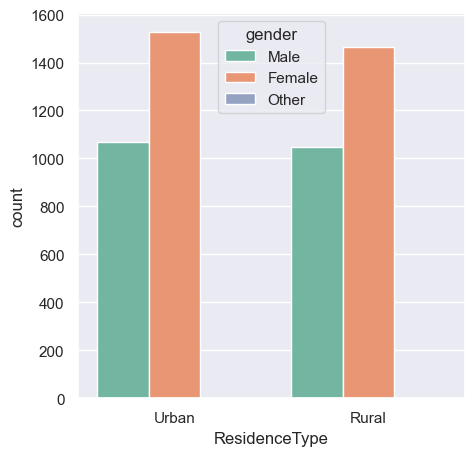

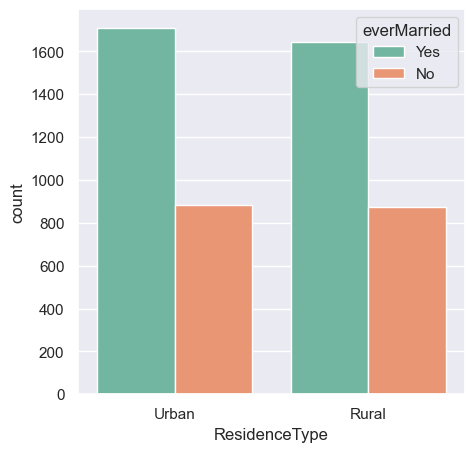

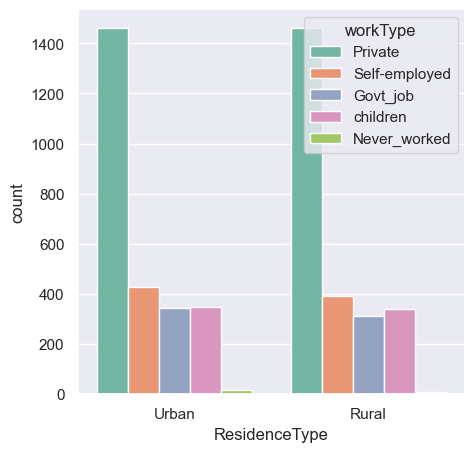

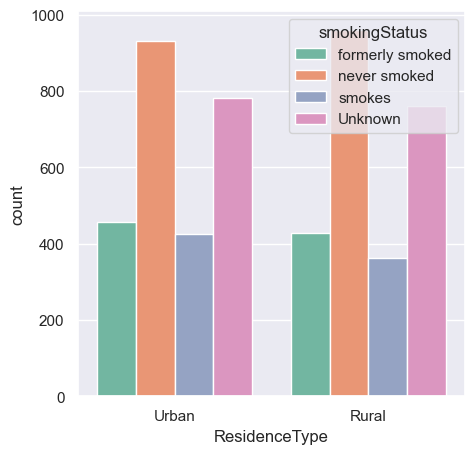

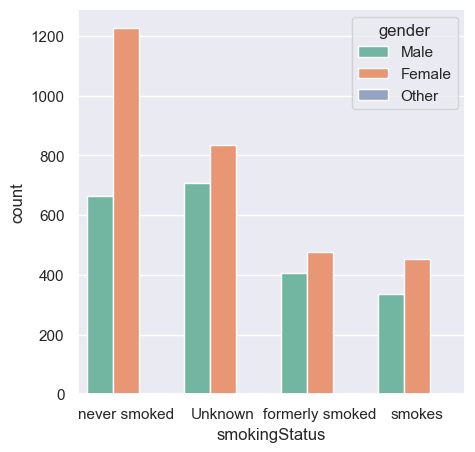

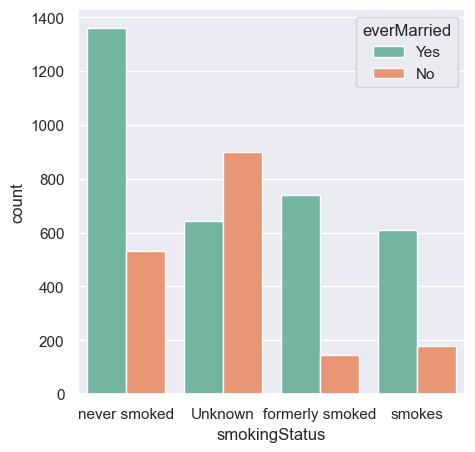

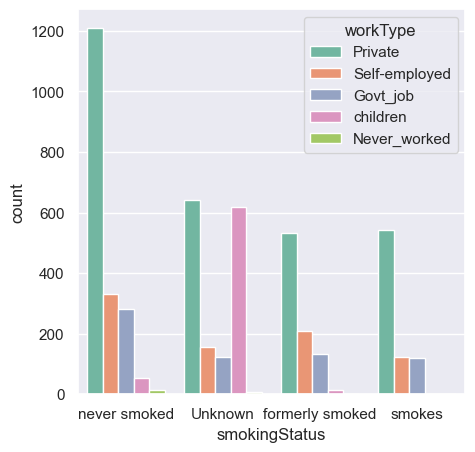

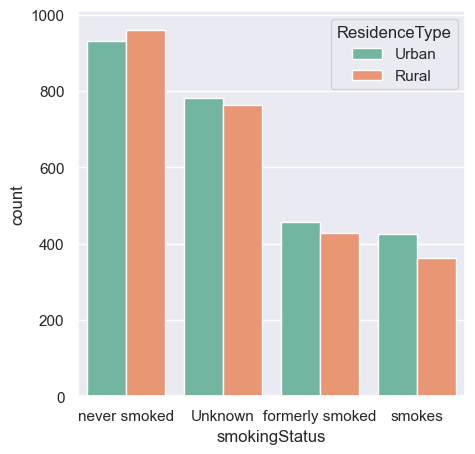

In [ ]:
for i in range(len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (5,5))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'Set2',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )

#  Splitting data

In [ ]:
# splitting data to features and target
features = dataframe.iloc[:, :-1].values
target = dataframe.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3436, 21), (860, 21), (3436,), (860,))

### Feature Scalling

In [ ]:
# Feature Scalling using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluate Model

## Support Vector Machine (SVM)

### Train

In [ ]:
# Training the SVM model on the Training set
classifier = SVC( kernel = 'linear', probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

### Predict

In [ ]:
y_pred_SVC = classifier.predict(X_test)

### Accuracy

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[732,   0],
       [  0, 128]], dtype=int64)

In [ ]:
# Calculate the accuracy_score
svm_acc = accuracy_score(y_test, y_pred_SVC)
svm_acc

1.0

In [ ]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(dataframe))
        predictedValue = classifier.predict(sc.transform([list(dataframe.iloc[randomValue, :-1])])) 
        actualValue    = dataframe.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0


In [ ]:
# drawing confusion matrix
fig = ff.create_annotated_heatmap(cm, colorscale='balance_r', showscale=True)
fig.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

In [ ]:
from sklearn.metrics import classification_report
y_labels = (y_pred_SVC > 0.5)
print(classification_report(y_test, y_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       732
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       860
   macro avg       1.00      1.00      1.00       860
weighted avg       1.00      1.00      1.00       860



In [ ]:
acc_train_svc = accuracy_score(y_test, y_pred_SVC)
y_pred_test_svc = classifier.predict(X_test)

acc_test_svc = accuracy_score(y_test, y_pred_test_svc)
svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

y_pred_prob_svc = classifier.predict_proba(X_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)
print('ROC AUC Score:', svc_roc_auc_score)

Precision: 1.000
Recall: 1.000
F-measure: 1.000
ROC AUC Score: 1.0


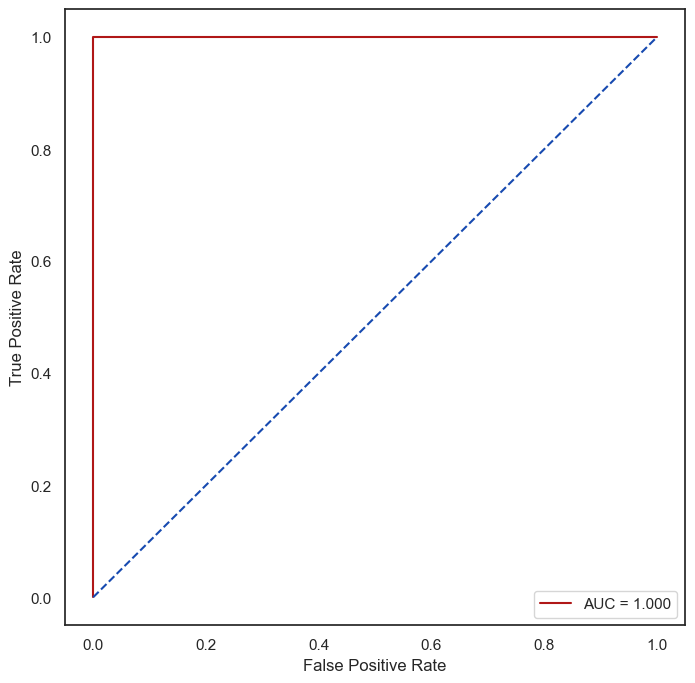

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Classification

In [ ]:
LR = LogisticRegression()

In [ ]:
LR = LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[732,   0],
       [  0, 128]], dtype=int64)

In [ ]:
LR_acc = accuracy_score(y_test, y_pred_LR)
LR_acc

1.0

In [ ]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(dataframe))
        predictedValue = LR.predict(sc.transform([list(dataframe.iloc[randomValue, :-1])])) 
        actualValue    = dataframe.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [0.] V.S actual value ==> 0.0


In [ ]:
from sklearn.metrics import classification_report
pred = LR.predict(X_test)
y_labels = (pred > 0.5)

print(classification_report(y_test, y_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       732
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       860
   macro avg       1.00      1.00      1.00       860
weighted avg       1.00      1.00      1.00       860



In [ ]:
acc_train_LR = accuracy_score(y_test, y_pred_LR)
y_pred_test_LR = classifier.predict(X_test)

acc_test_LR = accuracy_score(y_test, y_pred_test_LR)
LR_perc_score = precision_score(y_test, y_pred_test_LR)
LR_rec_score= recall_score(y_test, y_pred_test_LR)
LR_f1_score = f1_score(y_test, y_pred_test_LR)

y_pred_prob_LR = LR.predict_proba(X_test)[:, 1]
LR_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_LR)

print('Precision: %.3f' % LR_perc_score)
print('Recall: %.3f' % LR_rec_score)
print('F-measure: %.3f' % LR_f1_score)
print('ROC AUC Score:', LR_roc_auc_score)

Precision: 1.000
Recall: 1.000
F-measure: 1.000
ROC AUC Score: 1.0


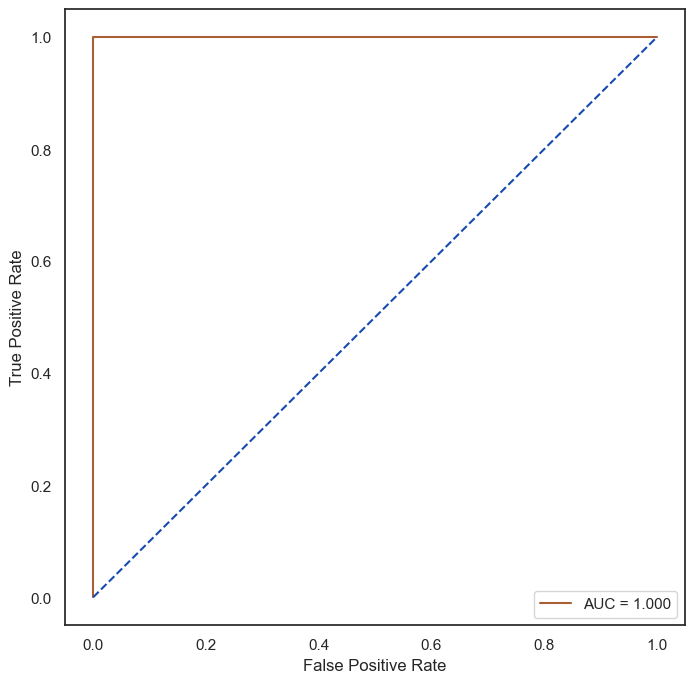

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#AA5e33', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
# k_fold cv
from sklearn.model_selection import cross_val_score
# 5 fold
scores = cross_val_score(classifier, X_train, y_train, scoring='r2')

In [ ]:

# printing the average score
print (np.mean(scores))

1.0


In [ ]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(classifier, X_test , y_test)
pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0.

In [ ]:
scores_test = cross_val_score(classifier, X_train, y_train, scoring='r2', cv=5)

In [ ]:
print (np.mean(scores_test))

1.0


# conclusion

* we have developed 2 models to classify the problem of whether the patient has a stroke or Not.
    * 1- Support Vector Machine.
    * 2- Logistic Regression

    ### Result

In [ ]:
print(f"Support Vector Machine Accuracy =>> {svm_acc:.2%}")
print(f"Logistic  Accuracy =>> {LR_acc:.2%}")

Support Vector Machine Accuracy =>> 100.00%
Logistic  Accuracy =>> 100.00%


In [ ]:
conclusion = pd.DataFrame(
    data = {
        'Model': ['Logistic Regression', 'SVClassifier'],
        'Precision':[LR_perc_score,svc_perc_score],
        'Recall':[LR_rec_score,svc_rec_score],
        'F1_measure':[LR_f1_score,svc_f1_score],
        'ROC AUC Score':[LR_roc_auc_score, svc_roc_auc_score],
        'Accuracy': [LR_acc, svm_acc]
#         'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

In [ ]:
conclusion

Model  Precision  Recall  F1_measure  ROC AUC Score  Accuracy
0  Logistic Regression        1.0     1.0         1.0            1.0       1.0
1         SVClassifier        1.0     1.0         1.0            1.0       1.0